In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import PIL
import pathlib
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pandas as pd

In [2]:
dataset = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_directory = tf.keras.utils.get_file('flower_photos', origin=dataset, cache_dir='.', untar=True)

In [3]:
os.listdir(data_directory)

['daisy', 'dandelion', 'LICENSE.txt', 'roses', 'sunflowers', 'tulips']

In [4]:
data_dir = pathlib.Path(data_directory)

In [5]:
data_dir

WindowsPath('datasets/flower_photos')

In [6]:
roses = list(data_dir.glob('roses/*.jpg'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

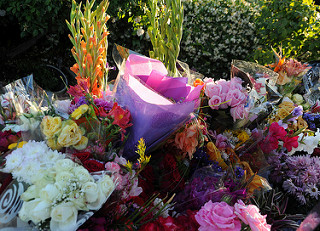

In [7]:
PIL.Image.open(roses[3])

In [8]:
flower_images_dictionary = {
    'daisy' : list(data_dir.glob('daisy/*.jpg')),
    'dandelion' : list(data_dir.glob('dandelion/*.jpg')),
    'roses' : list(data_dir.glob('roses/*.jpg')),
    'sunflower' : list(data_dir.glob('sunflower/*.jpg')),
    'tulip' : list(data_dir.glob('tulip/*.jpg'))
}

In [9]:
flower_label_dictionary = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflower' : 3,
    'tulip' : 4
}

In [10]:
img = cv2.imread(str(flower_images_dictionary['roses'][0]))

In [11]:
X, y = [], []
for flower_name, images in flower_images_dictionary.items():
    for image in images:
        image = str(image)
        img = cv2.imread(image)
        resized_img = cv2.resize(img, (150, 150))
        X.append(resized_img)
        y.append(flower_label_dictionary[flower_name])

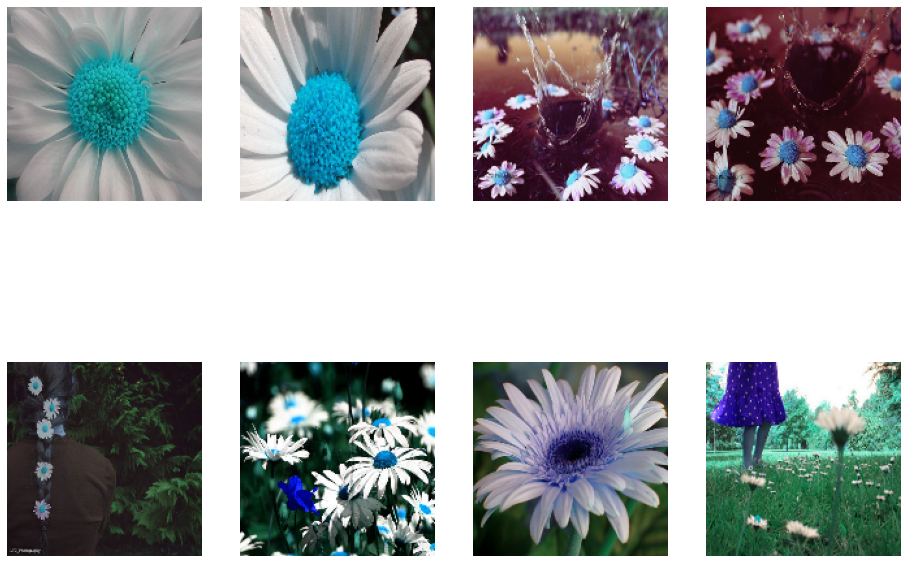

In [12]:
plt.figure(figsize=(16,25))
for x in range(8):
    plt.subplot(4, 4, x+1)
    plt.axis('off')
    plt.imshow(X[x])
plt.show()

In [13]:
X = np.array(X)
y = np.array(y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=420)

In [15]:
X_test.shape, X_train.shape

((652, 150, 150, 3), (1520, 150, 150, 3))

In [16]:
y_test.shape, y_train.shape

((652,), (1520,))

In [17]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [18]:
model = Sequential([
                    layers.Conv2D(16, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(128, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Flatten(),
                    layers.Dense(256, activation='relu'),
                    layers.Dense(5, activation='softmax')
])
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

In [19]:
trained_model = model.fit(X_train_scaled, y_train, epochs=20, batch_size=64, verbose=1)

Epoch 1/20
24/24 [==============================] - 9s 342ms/step - loss: 1.1037 - accuracy: 0.4250
Epoch 2/20
24/24 [==============================] - 9s 359ms/step - loss: 0.8277 - accuracy: 0.6211
Epoch 3/20
24/24 [==============================] - 11s 455ms/step - loss: 0.7184 - accuracy: 0.6961
Epoch 4/20
24/24 [==============================] - 12s 498ms/step - loss: 0.6078 - accuracy: 0.7658
Epoch 5/20
24/24 [==============================] - 11s 441ms/step - loss: 0.5362 - accuracy: 0.7855
Epoch 6/20
24/24 [==============================] - 9s 384ms/step - loss: 0.4768 - accuracy: 0.8039
Epoch 7/20
24/24 [==============================] - 8s 345ms/step - loss: 0.4196 - accuracy: 0.8289
Epoch 8/20
24/24 [==============================] - 9s 357ms/step - loss: 0.4165 - accuracy: 0.8408
Epoch 9/20
24/24 [==============================] - 8s 344ms/step - loss: 0.3305 - accuracy: 0.8684
Epoch 10/20
24/24 [==============================] - 8s 354ms/step - loss: 0.2629 - accuracy: 0.9

In [20]:
model.evaluate(X_test_scaled, y_test)

21/21 [==============================] - 1s 46ms/step - loss: 1.2329 - accuracy: 0.7868


[1.2328816652297974, 0.7868098020553589]

In [21]:
predictions = model.predict(X_test_scaled)

21/21 [==============================] - 1s 51ms/step


In [22]:
predictions

array([[9.9999881e-01, 1.1914904e-06, 5.5448685e-10, 7.7316617e-25,
        1.4953966e-24],
       [2.7252553e-14, 1.0000000e+00, 8.3781311e-09, 2.8207768e-26,
        2.1035606e-26],
       [1.1712104e-05, 2.3989454e-03, 9.9758935e-01, 1.1924785e-08,
        4.5756754e-09],
       ...,
       [1.2088360e-03, 9.9820280e-01, 5.8838527e-04, 6.2146197e-14,
        6.0957905e-14],
       [8.2691997e-02, 9.1730636e-01, 1.6645234e-06, 6.8617127e-17,
        1.1826074e-16],
       [3.7165631e-08, 3.9903545e-05, 9.9996006e-01, 6.1695156e-11,
        1.3949510e-11]], dtype=float32)

In [23]:
pred = []
for i in range(10):
    pred.append(np.argmax(predictions[i]))
pred

[0, 1, 2, 2, 0, 2, 2, 0, 2, 2]

In [24]:
y_test[0:10]

array([0, 1, 2, 2, 0, 2, 2, 0, 2, 0])

In [25]:
data = {'Predicted Results':pred, 'Actual Results':y_test[0:10]}
df = pd.DataFrame(data)

In [26]:
print(df)

   Predicted Results  Actual Results
0                  0               0
1                  1               1
2                  2               2
3                  2               2
4                  0               0
5                  2               2
6                  2               2
7                  0               0
8                  2               2
9                  2               0
